In [8]:
!pip install nltk scikit-learn pandas seaborn joblib -q

import nltk
nltk.download('movie_reviews', quiet=True)

import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

print("✅ All libraries ready!")

✅ All libraries ready!


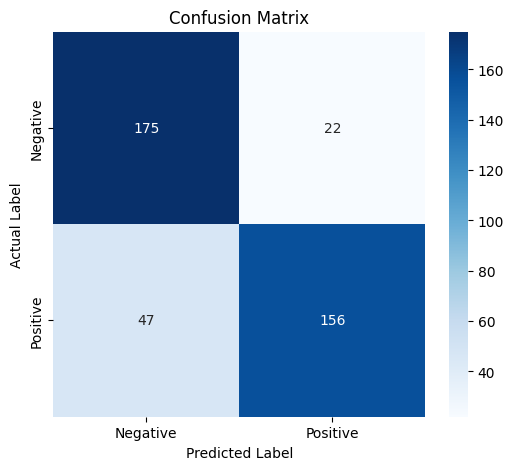

              precision    recall  f1-score   support

         neg       0.79      0.89      0.84       197
         pos       0.88      0.77      0.82       203

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400


✅ Model and Vectorizer saved as .pkl files!


In [9]:
cm = confusion_matrix(y_test, y_pred, labels=['neg', 'pos'])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Detailed report
print(classification_report(y_test, y_pred))

# Save model (so you can use it later)
joblib.dump(model, 'movie_sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("\n✅ Model and Vectorizer saved as .pkl files!")

In [10]:
y_pred = model.predict(X_test_vec)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎉 Accuracy: {accuracy*100:.2f}%")

# 3 Sample predictions (as required)
print("\n📝 3 Sample Predictions:")
for i in range(3):
    review_snippet = X_test.iloc[i][:150] + "..."
    actual = "Positive" if y_test.iloc[i] == "pos" else "Negative"
    predicted = "Positive" if y_pred[i] == "pos" else "Negative"
    print(f"\nSample {i+1}:")
    print(f"Review: {review_snippet}")
    print(f"Actual    → {actual}")
    print(f"Predicted → {predicted}")

🎉 Accuracy: 82.75%

📝 3 Sample Predictions:

Sample 1:
Review: of circumcision , psychic wounds and the family sitcom the opening segment is something of a foretaste of this film . there ' s a guy ' s voice tellin...
Actual    → Positive
Predicted → Positive

Sample 2:
Review: one year has passed since the last time we saw them , and but wayne campbell and garth algar are back but , they ' ve moved out of their parents homes...
Actual    → Positive
Predicted → Negative

Sample 3:
Review: reading the cast and director for the new mobster comedy , " analyze this , " i asked myself , " how could this miss ? " robert de niro ( " taxi drive...
Actual    → Negative
Predicted → Negative


In [11]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [12]:
X = df['review']
y = df['sentiment']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert words into numbers (this is the magic step)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("✅ Data split and converted to numbers!")
print(f"Training reviews: {len(X_train)}")
print(f"Testing reviews: {len(X_test)}")

✅ Data split and converted to numbers!
Training reviews: 1600
Testing reviews: 400


In [13]:
from nltk.corpus import movie_reviews

# Load all reviews
documents = []
for category in movie_reviews.categories():   # pos and neg
    for fileid in movie_reviews.fileids(category):
        review_text = ' '.join(movie_reviews.words(fileid))
        documents.append((review_text, category))

# Put in a nice table
df = pd.DataFrame(documents, columns=['review', 'sentiment'])
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  # shuffle

print(f"✅ Loaded {len(df)} movie reviews")
print(df['sentiment'].value_counts())
print("\nFirst 3 reviews:")
print(df.head(3))

✅ Loaded 2000 movie reviews
sentiment
pos    1000
neg    1000
Name: count, dtype: int64

First 3 reviews:
                                              review sentiment
0  the verdict : spine - chilling drama from horr...       pos
1  " the 44 caliber killer has struck again . " s...       neg
2  in the company of men made a splash at the sun...       pos
